In [2]:
from sklearn.cluster import KMeans, DBSCAN # sklearn.cluster 패키지
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
df = pd.read_excel('./data/부산_신고데이터/군집용_v1.xlsx')

불법유턴 = pd.read_excel('./data/부산_신고데이터/불법유턴_busan.xlsx')
불법좌회전 = pd.read_excel('./data/부산_신고데이터/불법좌회전_busan.xlsx')
신호위반 = pd.read_excel('./data/부산_신고데이터/신호위반_busan.xlsx')
중앙선침범 = pd.read_excel('./data/부산_신고데이터/중앙선침범_busan.xlsx')
진로변경위반 = pd.read_excel('./data/부산_신고데이터/진로변경방법위반_busan.xlsx')

In [16]:
군집용v2_1=pd.concat([불법좌회전[['위도','경도']], 신호위반[['위도','경도']]], axis=0)
군집용v2_2=pd.concat([불법유턴[['위도','경도']], 중앙선침범[['위도','경도']],진로변경위반[['위도','경도']]], axis=0)


In [18]:
# 데이터 자체에 결측치는 없고, 이상치를 따로 제거하지 않아도 되는(이상치는 자동으로 노이즈처리), 그리고 신고가 밀집한 지역을 알 수 있는 dascan을 이용하기로 결정

coordinates = df[['위도', '경도']].values

# DBSCAN 알고리즘 적용 (eps와 min_samples 값은 상황에 맞게 조절) / eps : 밀집도(100m의 원 안에) / min_samples : 최소 몇 개 이상의 포인트가 있는가?(130개 이상인 것들만)
# 포인트 4~5개를 선정하기 위해 eps와 min_samples값을 계속 조정함
db = DBSCAN(eps=0.001, min_samples=130).fit(coordinates)

# 각 포인트가 속한 클러스터의 레이블 (-1은 noise를 의미)
labels = db.labels_

# 클러스터 개수 (노이즈 포인트 제외)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 5


In [19]:
# labels 변수와 동일한 길이를 가진 새로운 열 'cluster' 생성
df['cluster'] = labels

# 각 군집(cluster)별 위도와 경도의 평균 계산
centroids = df.groupby('cluster')[['위도', '경도']].mean()

centroids

,위도,경도
cluster,,
-1,35.168832,129.053284
0,35.240255,129.084665
1,35.114720,128.919305
2,35.236217,129.168627
3,35.106041,128.968560
4,35.089064,128.912458


C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


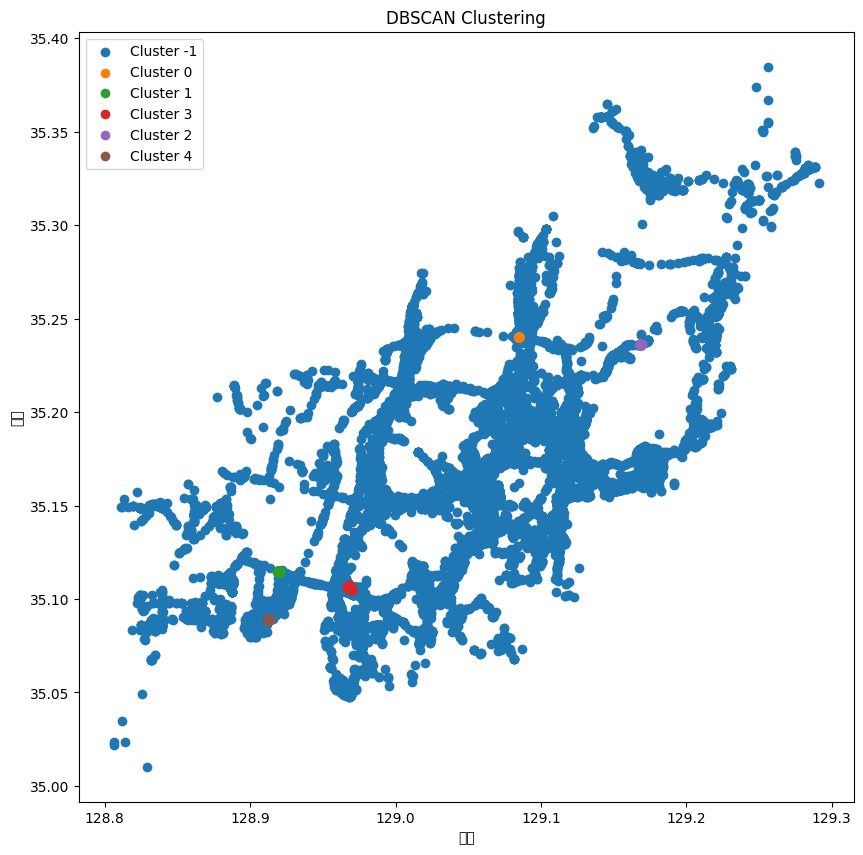

In [20]:
plt.figure(figsize=(10, 10))

# 각 군집별로 산점도 그리기
for cluster in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster]
    plt.scatter(cluster_data['경도'], cluster_data['위도'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering')
plt.xlabel('경도')
plt.ylabel('위도')

# 범례 추가
plt.legend()

plt.show()

In [21]:
df['cluster'] = df['cluster'].astype('category')

In [22]:
df['cluster'].value_counts()

cluster
-1    18871
3       245
2       207
0       182
1       163
4       146
Name: count, dtype: int64

In [23]:
# 데이터 자체에 결측치는 없고, 이상치를 따로 제거하지 않아도 되는(이상치는 자동으로 노이즈처리), 그리고 신고가 밀집한 지역을 알 수 있는 dascan을 이용하기로 결정

coordinates = 군집용v2_1[['위도', '경도']].values

# DBSCAN 알고리즘 적용 (eps와 min_samples 값은 상황에 맞게 조절) / eps : 밀집도(100m의 원 안에) / min_samples : 최소 몇 개 이상의 포인트가 있는가?(100개 이상인 것들만)
# 포인트 4~5개를 선정하기 위해 eps와 min_samples값을 계속 조정함
db = DBSCAN(eps=0.001, min_samples=100).fit(coordinates)

# 각 포인트가 속한 클러스터의 레이블 (-1은 noise를 의미)
labels = db.labels_

# 클러스터 개수 (노이즈 포인트 제외)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 4


In [24]:
# labels 변수와 동일한 길이를 가진 새로운 열 'cluster' 생성
군집용v2_1['cluster'] = labels

# 각 군집(cluster)별 위도와 경도의 평균 계산
centroids = 군집용v2_1.groupby('cluster')[['위도', '경도']].mean()

centroids

,위도,경도
cluster,,
-1,35.168196,129.049761
0,35.236214,129.168629
1,35.114731,128.919296
2,35.089073,128.912441
3,35.175248,129.081621


In [25]:
count1=군집용v2_1['cluster'].value_counts().to_frame()

In [26]:
표1=centroids.merge(count1, on='cluster')
표1

,위도,경도,count
cluster,,,
-1,35.168196,129.049761,9809
0,35.236214,129.168629,200
1,35.114731,128.919296,155
2,35.089073,128.912441,132
3,35.175248,129.081621,103


C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


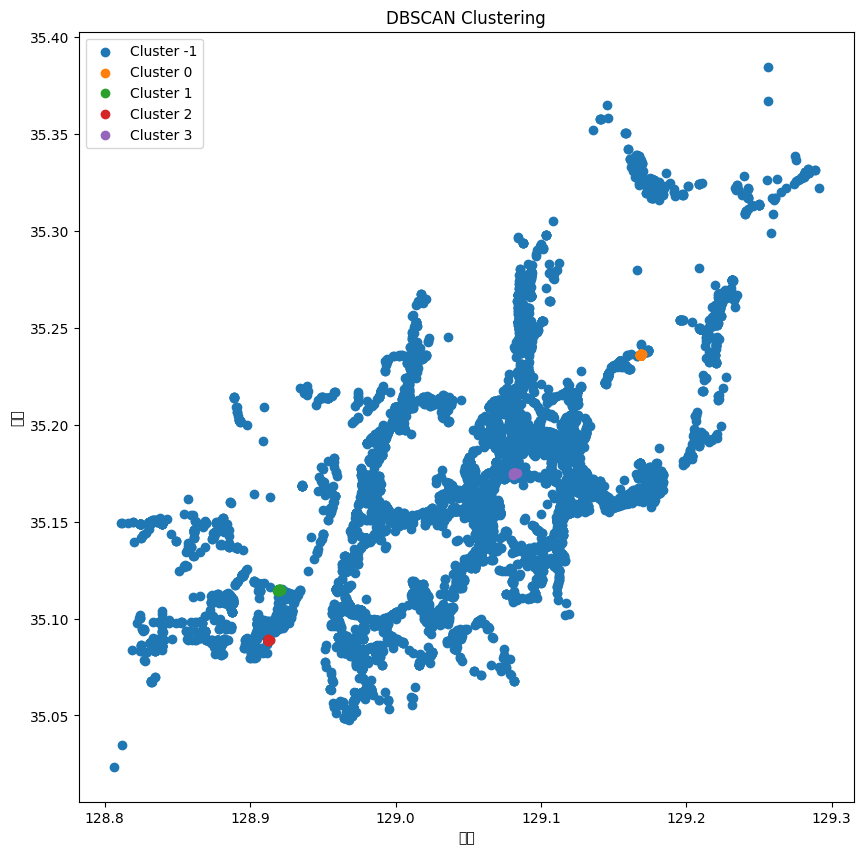

In [27]:
plt.figure(figsize=(10, 10))

# 각 군집별로 산점도 그리기
for cluster in 군집용v2_1['cluster'].unique():
    cluster_data = 군집용v2_1[군집용v2_1['cluster'] == cluster]
    plt.scatter(cluster_data['경도'], cluster_data['위도'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering')
plt.xlabel('경도')
plt.ylabel('위도')

# 범례 추가
plt.legend()

plt.show()

In [28]:
# 데이터 자체에 결측치는 없고, 이상치를 따로 제거하지 않아도 되는(이상치는 자동으로 노이즈처리), 그리고 신고가 밀집한 지역을 알 수 있는 dascan을 이용하기로 결정

coordinates = 군집용v2_2[['위도', '경도']].values

# DBSCAN 알고리즘 적용 (eps와 min_samples 값은 상황에 맞게 조절) / eps : 밀집도(100m의 원 안에) / min_samples : 최소 몇 개 이상의 포인트가 있는가?(100개 이상인 것들만)
# 포인트 4~5개를 선정하기 위해 eps와 min_samples값을 계속 조정함
db = DBSCAN(eps=0.001, min_samples=100).fit(coordinates)

# 각 포인트가 속한 클러스터의 레이블 (-1은 noise를 의미)
labels = db.labels_

# 클러스터 개수 (노이즈 포인트 제외)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


In [29]:
# labels 변수와 동일한 길이를 가진 새로운 열 'cluster' 생성
군집용v2_2['cluster'] = labels

# 각 군집(cluster)별 위도와 경도의 평균 계산
centroids = 군집용v2_2.groupby('cluster')[['위도', '경도']].mean()

centroids

,위도,경도
cluster,,
-1,35.169641,129.055314
0,35.136055,129.095246
1,35.240258,129.084661
2,35.105925,128.968682


In [30]:
count2=군집용v2_2['cluster'].value_counts()

In [31]:
표2=centroids.merge(count2, on='cluster')
표2

,위도,경도,count
cluster,,,
-1,35.169641,129.055314,9046
0,35.136055,129.095246,116
1,35.240258,129.084661,108
2,35.105925,128.968682,145


C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\yujin\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


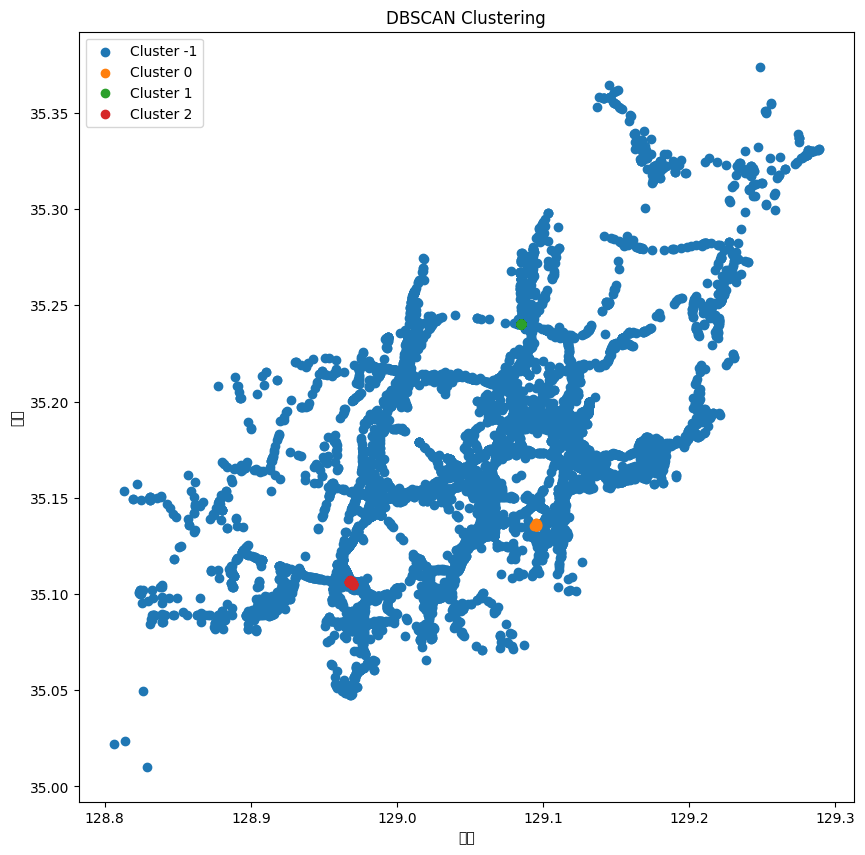

In [32]:
plt.figure(figsize=(10, 10))

# 각 군집별로 산점도 그리기
for cluster in 군집용v2_2['cluster'].unique():
    cluster_data = 군집용v2_2[군집용v2_2['cluster'] == cluster]
    plt.scatter(cluster_data['경도'], cluster_data['위도'], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering')
plt.xlabel('경도')
plt.ylabel('위도')

# 범례 추가
plt.legend()

plt.show()